In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_folder_path = r'D:\Project AUV\Dataset\Dataset' 

In [4]:
dataset_types = ['train', 'test']
fault_types = {
    'AddWeight': 'load_increase',
    'Normal': 'normal_state',
    'PressureGain_constant': 'depth_sensor_failure',
    'PropellerDamage_bad': 'severe_propeller_damage',
    'PropellerDamage_slight': 'slight_propeller_damage'
}

In [5]:
combined_data = {'train': [], 'test': []}

for dataset_type in dataset_types:
    dataset_path = os.path.join(base_folder_path, dataset_type)
    for fault_folder, fault_label in fault_types.items():
        fault_path = os.path.join(dataset_path, fault_folder)
        if os.path.exists(fault_path):
            for file_name in os.listdir(fault_path):
                if file_name.endswith('.csv'):
                    file_path = os.path.join(fault_path, file_name)
                    try:
                        df = pd.read_csv(file_path)
                        df['Fault_Type'] = fault_label
                        df['Dataset_Type'] = dataset_type
                        combined_data[dataset_type].append(df)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

# Combine all DataFrames into a single DataFrame for each dataset type
train_df = pd.concat(combined_data['train'], ignore_index=True) if combined_data['train'] else pd.DataFrame()
test_df = pd.concat(combined_data['test'], ignore_index=True) if combined_data['test'] else pd.DataFrame()

# Display the first few rows of the combined DataFrames
print("Training Data:")
print(train_df.head())
print("Testing Data:")
print(test_df.head())

Training Data:
     time  pwm1  pwm2  pwm3  pwm4  depth  press  voltage  roll  pitch    yaw  \
0  202409  1100  1100  1100  1100  -0.02    592    12.08  5.97  -0.06  37.16   
1  202409  1100  1100  1100  1100  -0.01    593    12.08  6.05  -0.19  37.16   
2  202409  1100  1100  1100  1100   0.00    594    12.06  6.12  -0.34  37.17   
3  202409  1183  1183  1183  1183   0.01    595    12.05  6.18  -0.51  37.17   
4  202409  1183  1183  1183  1183   0.01    595    11.97  6.21  -0.66  37.17   

    a_x   a_y   a_z  w_row  w_pitch  w_yaw     Fault_Type Dataset_Type  
0 -0.02  0.90  8.76    1.6     -2.1    0.3  load_increase        train  
1  0.13  0.95  8.56    1.5     -3.0    0.4  load_increase        train  
2  0.07  0.88  8.64    1.3     -3.4    0.2  load_increase        train  
3  0.09  0.96  8.80    0.6     -3.3    0.3  load_increase        train  
4  0.07  1.00  8.61    0.2     -2.7    0.1  load_increase        train  
Testing Data:
     time  pwm1  pwm2  pwm3  pwm4  depth  press  vol

In [6]:
print(len(train_df))
print(len(test_df))

192598
48225


In [7]:
train_df.shape

(192598, 19)

In [8]:
test_df.shape

(48225, 19)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192598 entries, 0 to 192597
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          192598 non-null  int64  
 1   pwm1          192598 non-null  int64  
 2   pwm2          192598 non-null  int64  
 3   pwm3          192598 non-null  int64  
 4   pwm4          192598 non-null  int64  
 5   depth         192598 non-null  float64
 6   press         192598 non-null  int64  
 7   voltage       192598 non-null  float64
 8   roll          192598 non-null  float64
 9   pitch         192598 non-null  float64
 10  yaw           192598 non-null  float64
 11  a_x           192598 non-null  float64
 12  a_y           192598 non-null  float64
 13  a_z           192598 non-null  float64
 14  w_row         192598 non-null  float64
 15  w_pitch       192598 non-null  float64
 16  w_yaw         192598 non-null  float64
 17  Fault_Type    192598 non-null  object 
 18  Data

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48225 entries, 0 to 48224
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          48225 non-null  int64  
 1   pwm1          48225 non-null  int64  
 2   pwm2          48225 non-null  int64  
 3   pwm3          48225 non-null  int64  
 4   pwm4          48225 non-null  int64  
 5   depth         48225 non-null  float64
 6   press         48225 non-null  int64  
 7   voltage       48225 non-null  float64
 8   roll          48225 non-null  float64
 9   pitch         48225 non-null  float64
 10  yaw           48225 non-null  float64
 11  a_x           48225 non-null  float64
 12  a_y           48225 non-null  float64
 13  a_z           48225 non-null  float64
 14  w_row         48225 non-null  float64
 15  w_pitch       48225 non-null  float64
 16  w_yaw         48225 non-null  float64
 17  Fault_Type    48225 non-null  object 
 18  Dataset_Type  48225 non-nu

In [11]:
train_df.dtypes

time              int64
pwm1              int64
pwm2              int64
pwm3              int64
pwm4              int64
depth           float64
press             int64
voltage         float64
roll            float64
pitch           float64
yaw             float64
a_x             float64
a_y             float64
a_z             float64
w_row           float64
w_pitch         float64
w_yaw           float64
Fault_Type       object
Dataset_Type     object
dtype: object

In [12]:
train_df["Fault_Type"].unique()
test_df["Fault_Type"].unique()

array(['load_increase', 'normal_state', 'depth_sensor_failure',
       'severe_propeller_damage', 'slight_propeller_damage'], dtype=object)

In [13]:
train_df["Fault_Type"].value_counts()

Fault_Type
load_increase              41930
depth_sensor_failure       41762
slight_propeller_damage    40751
severe_propeller_damage    38966
normal_state               29189
Name: count, dtype: int64

In [14]:
test_df["Fault_Type"].value_counts()

Fault_Type
load_increase              10579
depth_sensor_failure       10384
slight_propeller_damage    10186
severe_propeller_damage     9812
normal_state                7264
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df["Fault_Type"] = label_encoder.fit_transform(train_df["Fault_Type"])
test_df["Fault_Type"] = label_encoder.fit_transform(test_df["Fault_Type"])
train_df.head()

,time,pwm1,pwm2,pwm3,pwm4,depth,press,voltage,roll,pitch,yaw,a_x,a_y,a_z,w_row,w_pitch,w_yaw,Fault_Type,Dataset_Type
0,202409,1100,1100,1100,1100,-0.02,592,12.08,5.97,-0.06,37.16,-0.02,0.90,8.76,1.6,-2.1,0.3,1,train
1,202409,1100,1100,1100,1100,-0.01,593,12.08,6.05,-0.19,37.16,0.13,0.95,8.56,1.5,-3.0,0.4,1,train
2,202409,1100,1100,1100,1100,0.00,594,12.06,6.12,-0.34,37.17,0.07,0.88,8.64,1.3,-3.4,0.2,1,train
3,202409,1183,1183,1183,1183,0.01,595,12.05,6.18,-0.51,37.17,0.09,0.96,8.80,0.6,-3.3,0.3,1,train
4,202409,1183,1183,1183,1183,0.01,595,11.97,6.21,-0.66,37.17,0.07,1.00,8.61,0.2,-2.7,0.1,1,train


In [16]:
# Calculate summary statistics for each column
summary = train_df.groupby('Fault_Type').describe()
print(summary)

               time                                                   \
              count           mean           std       min       25%   
Fault_Type                                                             
0           41762.0  176113.701810  28281.746987  133427.0  150531.0   
1           41930.0  187894.042642  22774.856161  151357.0  163213.0   
2           29189.0  195884.629689  12265.803219  162021.0  193407.0   
3           38966.0  179311.402453  30092.643494  123300.0  151335.0   
4           40751.0  187370.581360  32955.172574   20128.0  163700.0   

                                             pwm1               ... w_pitch  \
                 50%       75%       max    count         mean  ...     75%   
Fault_Type                                                      ...           
0           193515.0  203031.0  214040.0  41762.0  1197.085700  ...     3.5   
1           194432.0  210442.0  215837.0  41930.0  1182.509420  ...     5.1   
2           195303.0  202338

In [17]:
for fault_type in range(0, 5):
    fault_type_summary = train_df[train_df['Fault_Type'] == fault_type].drop(columns=['Fault_Type']).describe()
    print(f"Summary statistics for Fault_Type {fault_type}:\n", fault_type_summary)
    print("\n" + "="*50 + "\n")

Summary statistics for Fault_Type 0:
                 time          pwm1          pwm2          pwm3          pwm4  \
count   41762.000000  41762.000000  41762.000000  41762.000000  41762.000000   
mean   176113.701810   1197.085700   1197.085700   1197.085700   1197.085700   
std     28281.746987     12.780357     12.780357     12.780357     12.780357   
min    133427.000000   1000.000000   1000.000000   1000.000000   1000.000000   
25%    150531.000000   1197.000000   1197.000000   1197.000000   1197.000000   
50%    193515.000000   1198.000000   1198.000000   1198.000000   1198.000000   
75%    203031.000000   1200.000000   1200.000000   1200.000000   1200.000000   
max    214040.000000   1204.000000   1204.000000   1204.000000   1204.000000   

              depth         press       voltage          roll         pitch  \
count  41762.000000  41762.000000  41762.000000  41762.000000  41762.000000   
mean       0.468642    638.364398     11.962107      3.226623      2.361894   
std 

<Figure size 1800x1800 with 0 Axes>

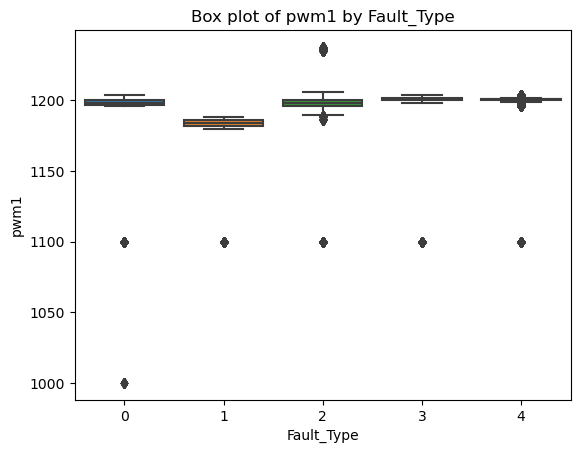

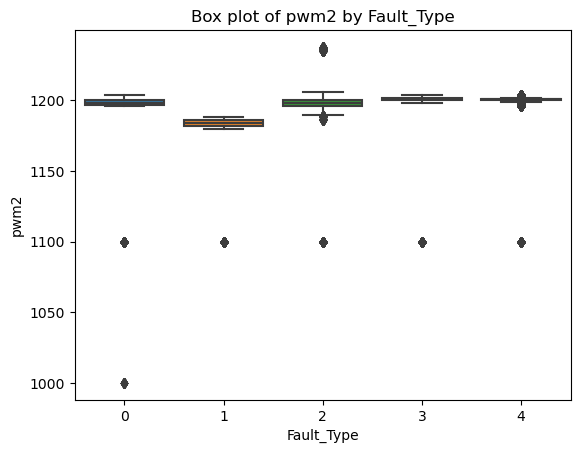

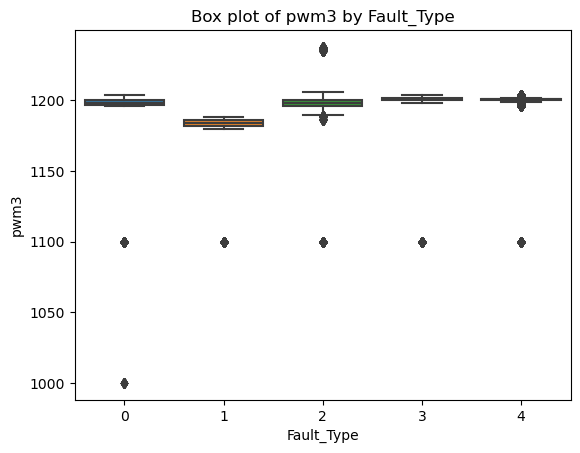

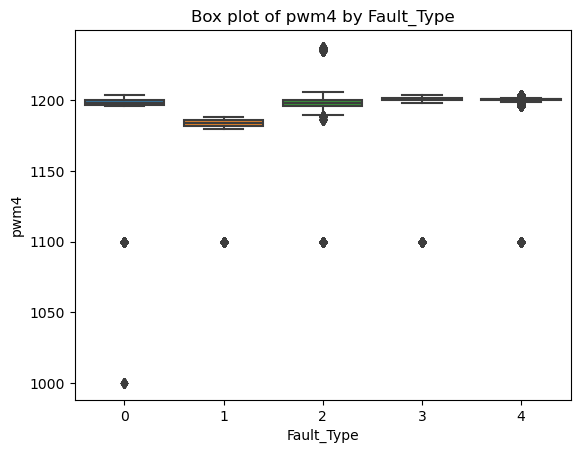

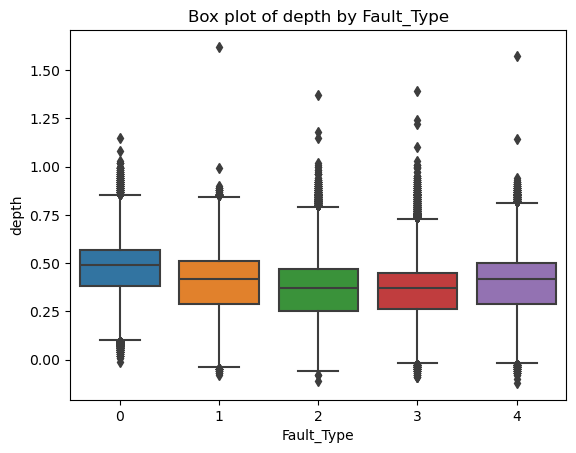

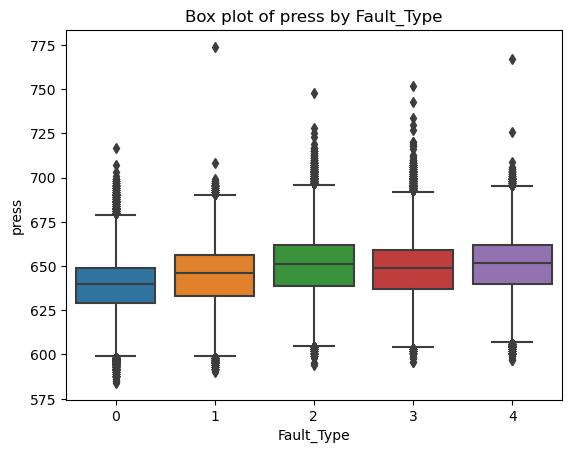

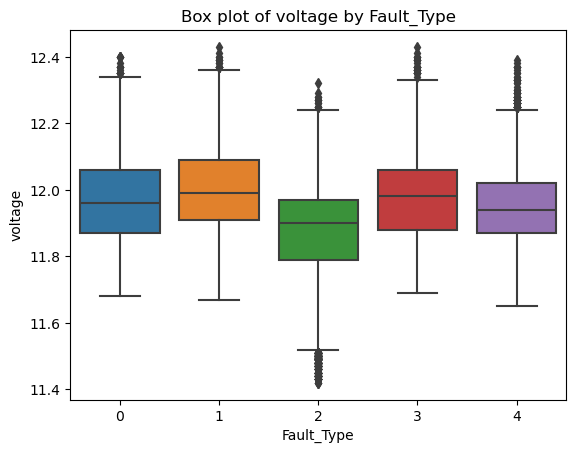

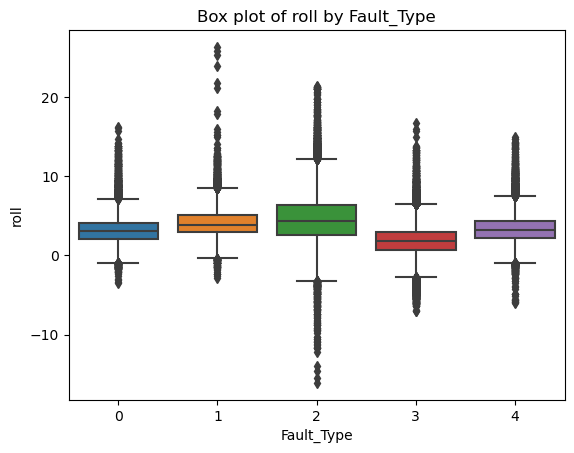

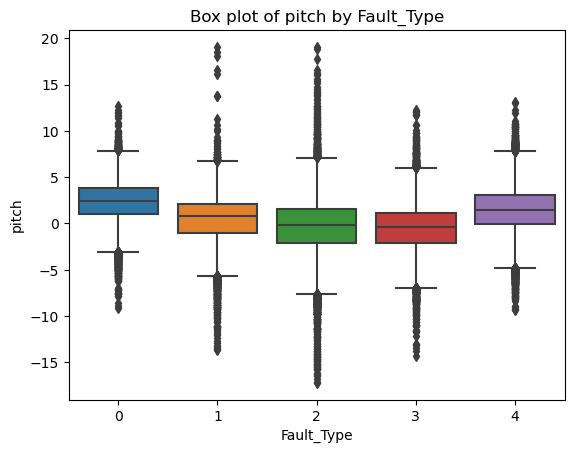

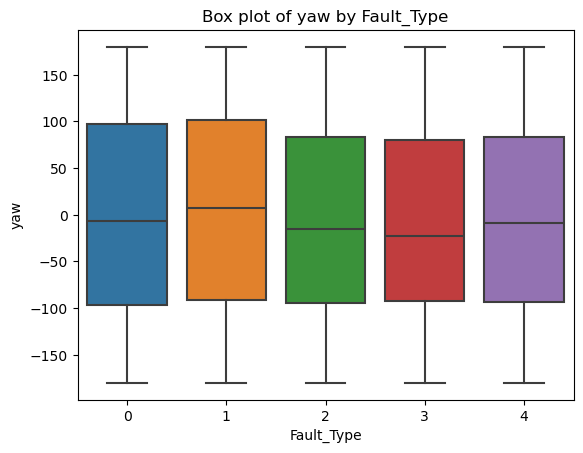

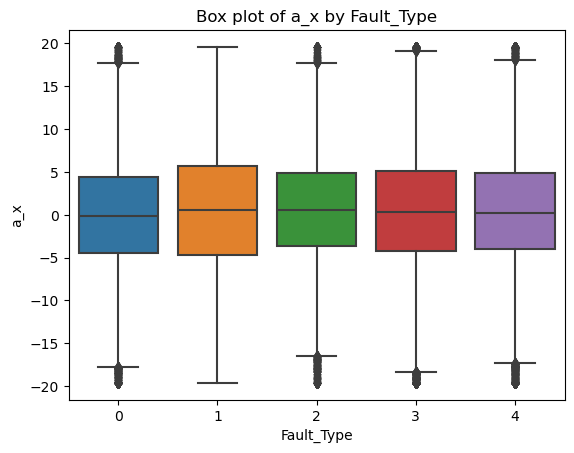

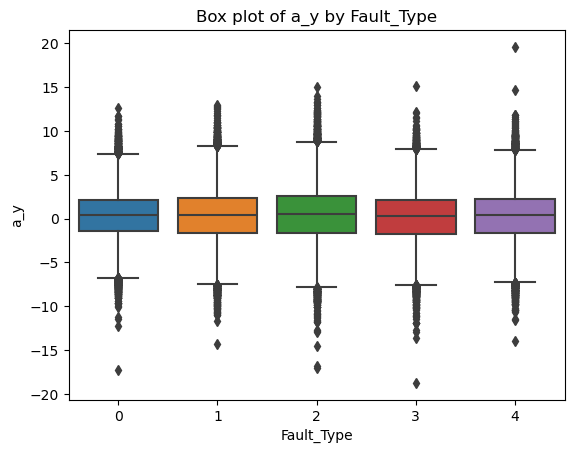

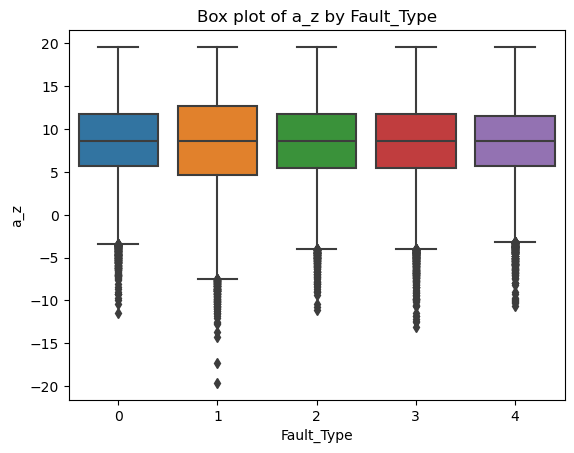

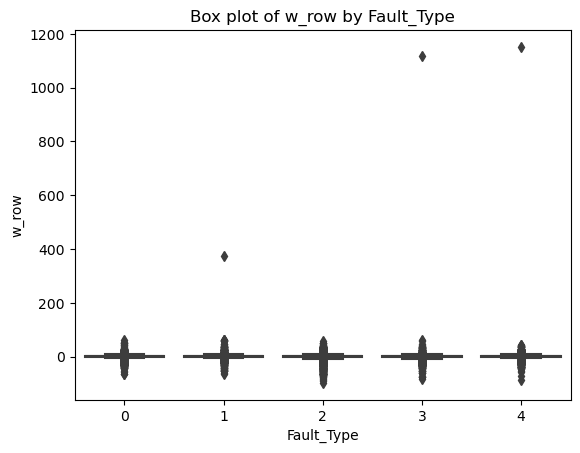

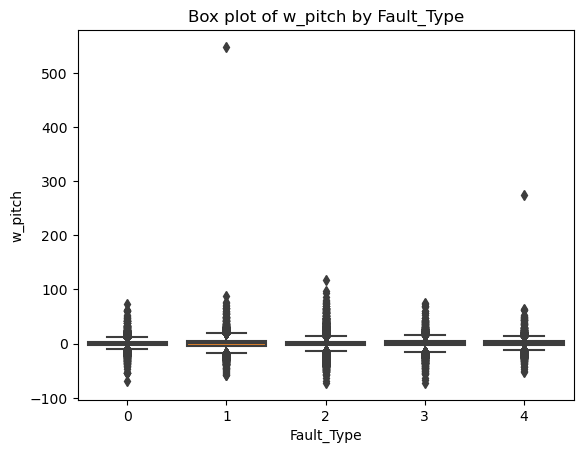

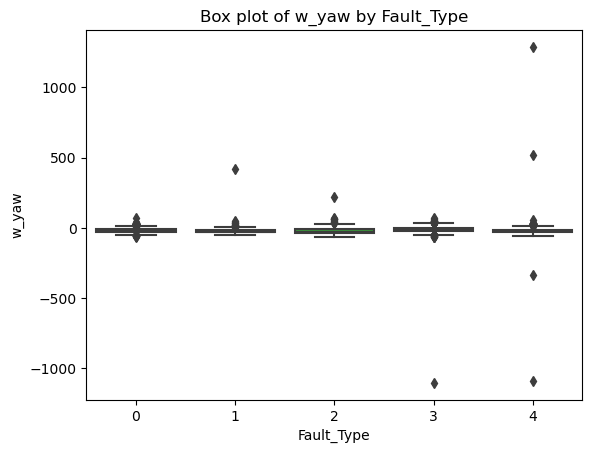

In [18]:
# Create a box plot for each variable
exclude_columns = ['time', 'Fault_Type', 'Dataset_Type']
columns_to_plot = [col for col in train_df.columns if col not in exclude_columns]
# Set up the matplotlib figure
plt.figure(figsize=(18, 18))

# Loop through each column and create a box plot for each
for column in columns_to_plot:
    plt.figure()
    sns.boxplot(x='Fault_Type', y=column, data=train_df)
    plt.title(f'Box plot of {column} by Fault_Type')
    plt.show()

In [19]:
'''# KDE plot for each variable
exclude_columns = ['time', 'Fault_Type', 'Dataset_Type']

# Select columns to plot
columns_to_plot = [col for col in train_df.columns if col not in exclude_columns]

for column in columns_to_plot:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=train_df, x=column, hue='Fault_Type', fill=True)
    plt.title(f'KDE plot of {column} by Fault_Type')
    plt.show()'''

"# KDE plot for each variable\nexclude_columns = ['time', 'Fault_Type', 'Dataset_Type']\n\n# Select columns to plot\ncolumns_to_plot = [col for col in train_df.columns if col not in exclude_columns]\n\nfor column in columns_to_plot:\n    plt.figure(figsize=(6,4))\n    sns.kdeplot(data=train_df, x=column, hue='Fault_Type', fill=True)\n    plt.title(f'KDE plot of {column} by Fault_Type')\n    plt.show()"

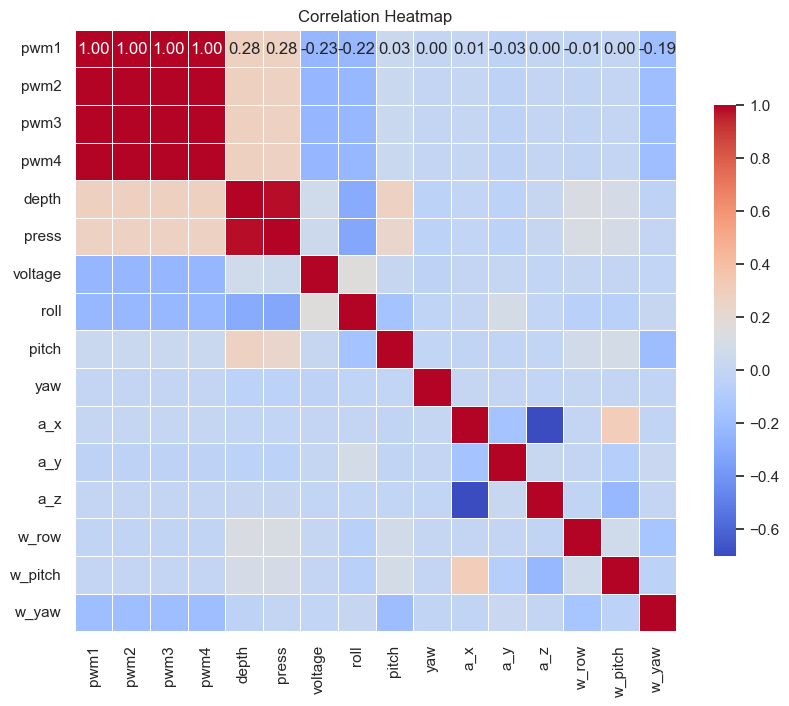

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_df' is your DataFrame and 'fault_type' is the specific fault type you're interested in

# Load the data into a pandas DataFrame
data = train_df[train_df['Fault_Type'] == fault_type].drop(columns=['Fault_Type', 'Dataset_Type', 'time'])

# Calculate the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
sns.set(style='white')

# Set up the plotting figure
f, ax = plt.subplots(figsize=(9.7, 11.7))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(f'Correlation Heatmap')
plt.show()


In [21]:
# Calculate the correlation matrix
corr_matrix = data.corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(len(to_drop)); print(to_drop)

4
['pwm2', 'pwm3', 'pwm4', 'press']


In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dropout, Dense, LSTM, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
combined_df = pd.concat([train_df, test_df], ignore_index=True)
# Drop unnecessary columns
data = combined_df.drop(['time', 'Dataset_Type'], axis=1)

# Use original combined dataset for splitting into train and test sets
tr_df = data.sample(frac=0.8, random_state=42)
te_df = data.drop(tr_df.index)

# Sequence length processing
sequence_length = 196
features = data.columns[:-1]

def process_sequence(df, seq_len):
    processed_data = []
    labels = []
    for i in range(0, len(df), seq_len):
        end_idx = i + seq_len
        if end_idx > len(df):
            break
        seq_data = df.iloc[i:end_idx].values
        processed_data.append(seq_data)
        labels.append(df.iloc[end_idx - 1]['Fault_Type'])
    return np.array(processed_data), np.array(labels)

X, y = process_sequence(data, sequence_length)

# Data normalization
scaler = MinMaxScaler()
X = X.reshape(-1, X.shape[-1])
X = scaler.fit_transform(X)
X = X.reshape(-1, sequence_length, X.shape[-1])

# Split the data into training and testing sets
train_idx = int(len(X) * 0.8)
X_train, y_train = X[:train_idx], y[:train_idx]
X_test, y_test = X[train_idx:], y[train_idx:]

input_shape = (sequence_length, X_train.shape[2])

Training fold 1...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - accuracy: 0.2296 - loss: 2.7443 - val_accuracy: 0.3959 - val_loss: 2.5080
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.2830 - loss: 2.4482 - val_accuracy: 0.3959 - val_loss: 2.2099
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3574 - loss: 2.1681 - val_accuracy: 0.3959 - val_loss: 1.9000
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4025 - loss: 1.9273 - val_accuracy: 0.6701 - val_loss: 1.6618
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4437 - loss: 1.7914 - val_accuracy: 0.7360 - val_loss: 1.4922
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5103 - loss: 1.5971 - val_accuracy: 0.6193 - val_loss: 1.3690
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5287 - loss: 1.5360 - val_accuracy: 0.7817 - val_loss: 1.3190
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.4934 - loss: 1.5161 - val_accuracy:

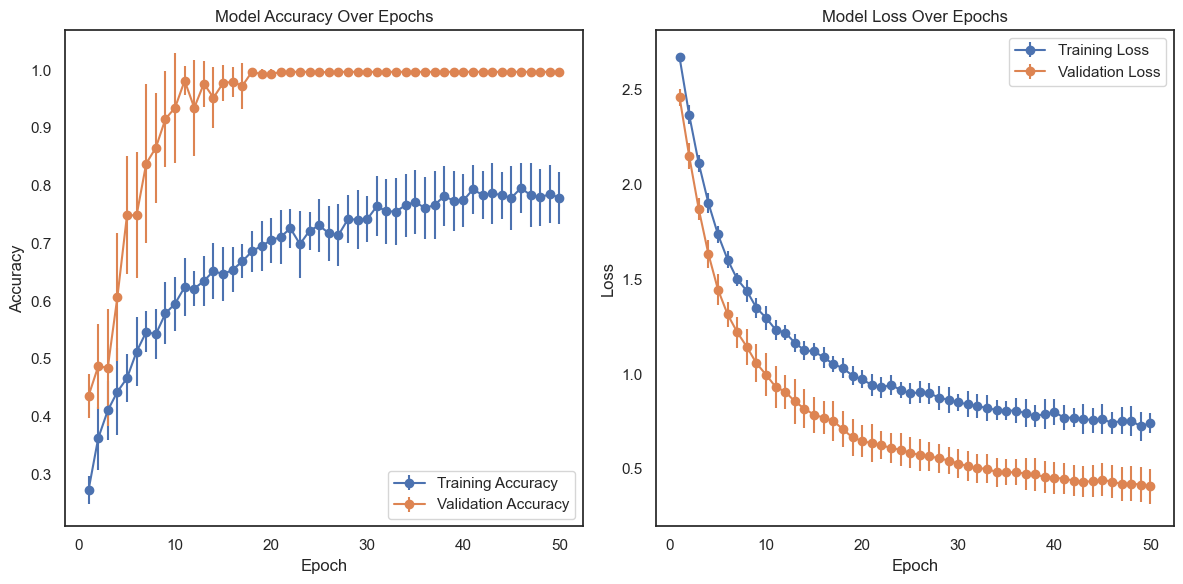

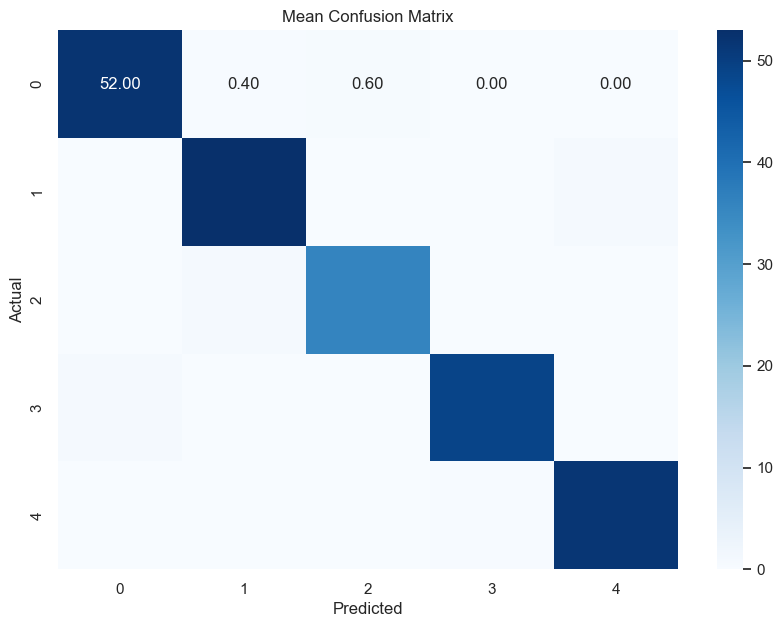

Mean Accuracy Across Folds: 99.70%
Mean Loss: 0.40789602398872377
Mean F1 Score: 0.9821243565079486


In [23]:
#L2 regularisation
from keras.layers import Conv1D, GlobalAveragePooling1D, Dropout, Dense
from keras.optimizers import Adam
from keras.regularizers import l2


# Function to build the SeqCNN model with increased dropout and L2 regularization
def build_seqcnn(input_shape):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(Conv1D(64, 5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Conv1D(16, 20, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))  # Increased dropout rate
    model.add(Dense(5, activation='softmax'))
    return model

# Assuming X_train, y_train, X_test, y_test are already defined
input_shape = (sequence_length, X.shape[-1])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

# Convert y_train to a numpy array if it's not already
y_train = np.array(y_train)

# Lists to store results from each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
confusion_matrices = []
f1_scores = []
final_val_accuracies = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    
    # Create the model for each fold to ensure weights are not carried over
    input_shape = (sequence_length, X.shape[-1])
    seqcnn_model = build_seqcnn(input_shape)
    seqcnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Indexing numpy arrays directly
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    history = seqcnn_model.fit(
        X_fold_train, 
        y_fold_train, 
        epochs=50, 
        batch_size=128, 
        validation_data=(X_fold_val, y_fold_val)
    )
    
    # Store training and validation accuracy and loss for each epoch
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Save final epoch validation accuracy for this fold
    final_val_accuracies.append(history.history['val_accuracy'][-1])
    
    # Evaluate the model
    loss, accuracy = seqcnn_model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    
    # Confusion Matrix and F1 Score
    y_pred = np.argmax(seqcnn_model.predict(X_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)
    
    fold_no += 1

# Pad sequences to the length of the longest sequence
max_len = max(len(seq) for seq in train_accuracies)

def pad_sequences(sequences, max_len):
    padded_sequences = np.array([np.pad(seq, (0, max_len - len(seq)), 'edge') for seq in sequences])
    return padded_sequences

train_accuracies = pad_sequences(train_accuracies, max_len)
val_accuracies = pad_sequences(val_accuracies, max_len)
train_losses = pad_sequences(train_losses, max_len)
val_losses = pad_sequences(val_losses, max_len)

# Calculate mean and standard deviation over epochs
mean_train_accuracy = np.mean(train_accuracies, axis=0)
std_train_accuracy = np.std(train_accuracies, axis=0)
mean_val_accuracy = np.mean(val_accuracies, axis=0)
std_val_accuracy = np.std(val_accuracies, axis=0)

mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Mean confusion matrix and F1 score
mean_conf_matrix = np.mean(confusion_matrices, axis=0)
mean_f1_score = np.mean(f1_scores)

# Calculate mean validation accuracy across all folds
mean_accuracy_across_folds = np.mean(final_val_accuracies)
mean_loss = np.mean(val_losses[:, -1])  # Final epoch validation loss

epochs = range(1, max_len + 1)  # Adjust the range to the actual number of epochs

# Plot training and validation accuracy with error bars
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(epochs, mean_train_accuracy, yerr=std_train_accuracy, fmt='o-', label='Training Accuracy')
plt.errorbar(epochs, mean_val_accuracy, yerr=std_val_accuracy, fmt='o-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss with error bars
plt.subplot(1, 2, 2)
plt.errorbar(epochs, mean_train_loss, yerr=std_train_loss, fmt='o-', label='Training Loss')
plt.errorbar(epochs, mean_val_loss, yerr=std_val_loss, fmt='o-', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the confusion matrix averaged over all folds
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mean Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print mean accuracy, loss, and F1 score
print(f'Mean Accuracy Across Folds: {mean_accuracy_across_folds * 100:.2f}%')
print(f'Mean Loss: {mean_loss}')
print(f'Mean F1 Score: {mean_f1_score}')


In [24]:
seqcnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 194, 64)             │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 190, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 171, 16)             │          20,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,361 (520.95 KB)

 Trainable params: 44,453 (173.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,908 (347.30 KB)

Training fold 1...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3747 - loss: 1.4780 - val_accuracy: 0.5838 - val_loss: 0.9698
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 500ms/step - accuracy: 0.7391 - loss: 0.8028 - val_accuracy: 0.8020 - val_loss: 0.5336
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 496ms/step - accuracy: 0.8734 - loss: 0.4157 - val_accuracy: 0.8223 - val_loss: 0.3988
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.9585 - loss: 0.1882 - val_accuracy: 0.9848 - val_loss: 0.2584
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.9983 - loss: 0.0763 - val_accuracy: 0.9848 - val_loss: 0.2200
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.9966 - loss: 0.0394 - val_accuracy: 0.9848 - val_loss: 0.2531
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.9995 - loss: 0.0141 - val_accuracy: 0.9848 - val_loss: 0.2583
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 522ms/step - accuracy: 0.9988 - loss: 0.0075 - val_accuracy: 0

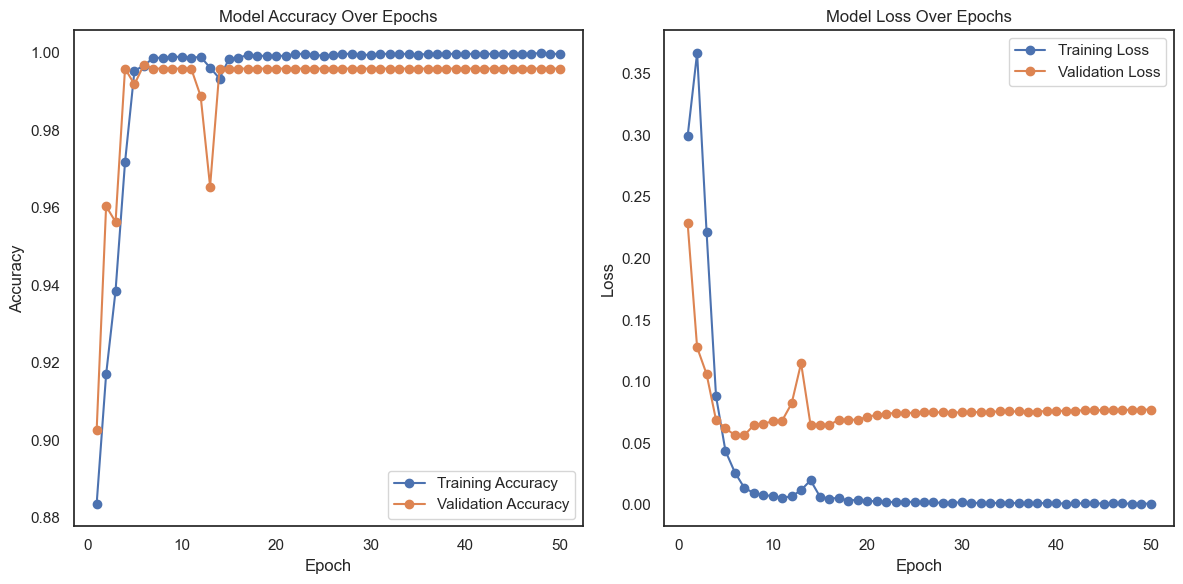

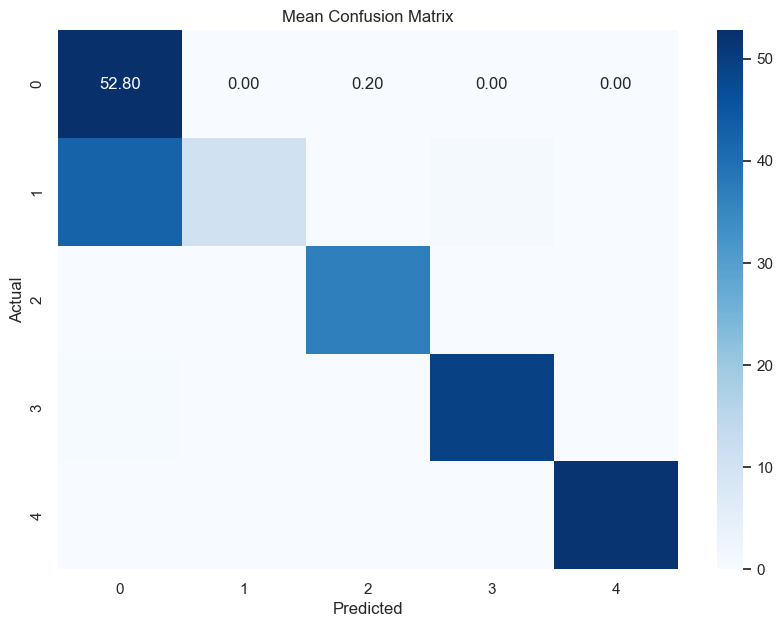

Mean Test Accuracy Across Folds: 81.87%


In [25]:
#simple lstm
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Flatten, Dropout
from keras.optimizers import Adam

# Function to build the LSTM model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(TimeDistributed(Dense(50, activation='relu')))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(5, activation='softmax'))
    return model

# Assuming X_train, y_train, X_test, y_test are already defined
input_shape = (sequence_length, X_train.shape[-1])
lstm_model = build_lstm(input_shape)
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM Model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

# Lists to store results from each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
confusion_matrices = []
final_val_accuracies = []
final_test_accuracies = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    history = lstm_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val))
    
    # Store training and validation accuracy and loss for each epoch
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Evaluate the model
    loss, accuracy = lstm_model.evaluate(X_test, y_test)
    final_test_accuracies.append(accuracy)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    
    # Confusion Matrix
    y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    fold_no += 1

# Pad sequences to the length of the longest sequence
max_len = max(len(seq) for seq in train_accuracies)

def pad_sequences(sequences, max_len):
    padded_sequences = np.array([np.pad(seq, (0, max_len - len(seq)), 'edge') for seq in sequences])
    return padded_sequences

train_accuracies = pad_sequences(train_accuracies, max_len)
val_accuracies = pad_sequences(val_accuracies, max_len)
train_losses = pad_sequences(train_losses, max_len)
val_losses = pad_sequences(val_losses, max_len)

# Calculate mean and standard deviation over epochs
mean_train_accuracy = np.mean(train_accuracies, axis=0)
mean_val_accuracy = np.mean(val_accuracies, axis=0)
mean_train_loss = np.mean(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)

# Mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Calculate mean test accuracy across all folds
mean_test_accuracy = np.mean(final_test_accuracies)

epochs = range(1, max_len + 1)  # Adjust the range to the actual number of epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, mean_train_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, mean_val_accuracy, 'o-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, mean_train_loss, 'o-', label='Training Loss')
plt.plot(epochs, mean_val_loss, 'o-', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the confusion matrix averaged over all folds
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mean Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print mean accuracy and loss
print(f'Mean Test Accuracy Across Folds: {mean_test_accuracy * 100:.2f}%')


In [26]:
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 196, 50)             │          13,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 196, 50)             │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 9800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │          49,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,467 (763.55 KB)

 Trainable params: 65,155 (254.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130,312 (509.04 KB)

Training fold 1...
Test Accuracy for fold 1: 98.37%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 809ms/step
Training fold 2...
Test Accuracy for fold 2: 94.31%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 826ms/step
Training fold 3...
Test Accuracy for fold 3: 99.19%
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 816ms/step
Training fold 4...
Test Accuracy for fold 4: 98.78%
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step
Training fold 5...
Test Accuracy for fold 5: 77.64%
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 448ms/step


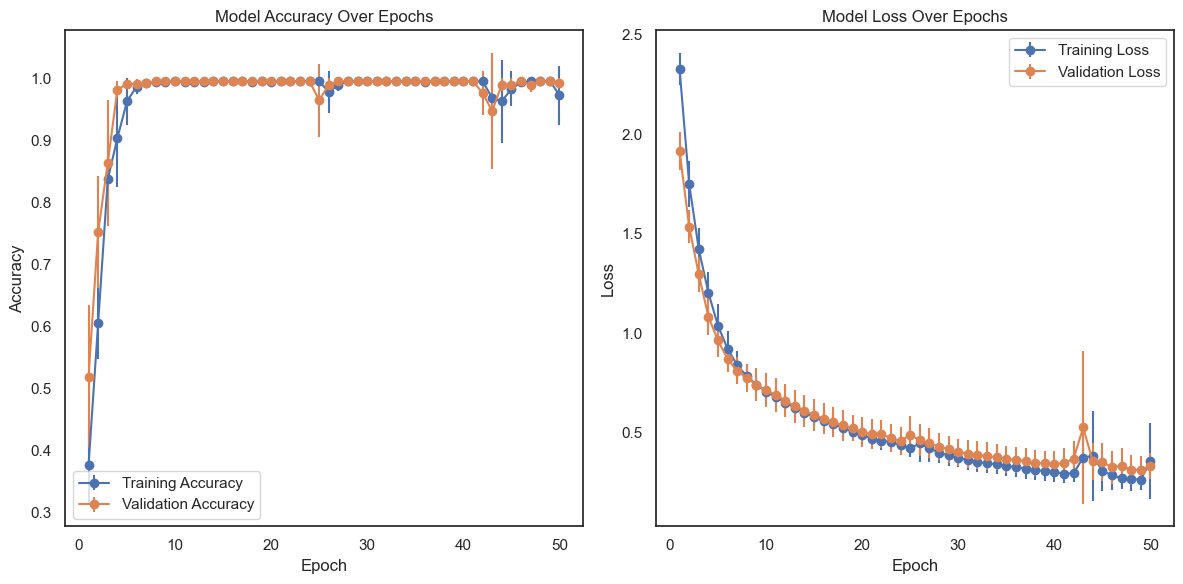

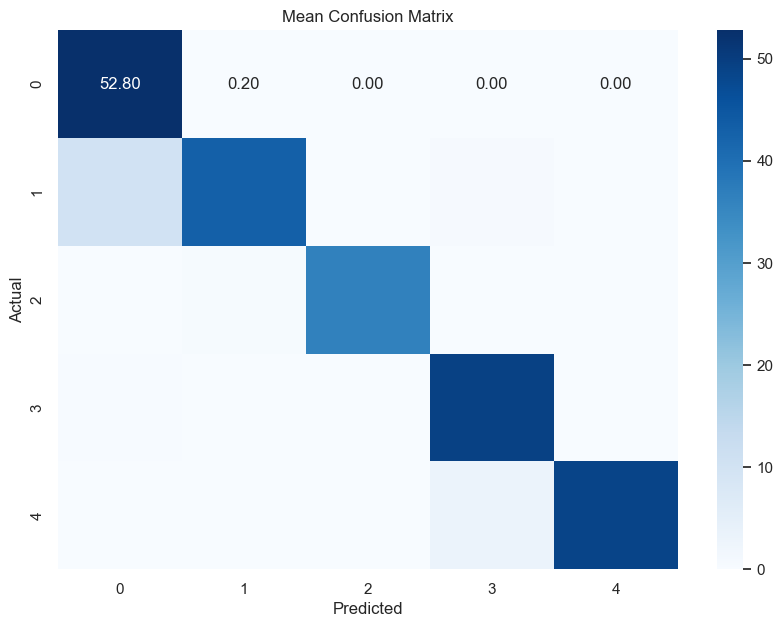

Mean Accuracy Across Folds: 93.66%
Mean Loss: 0.3328338384628296
Mean F1 Score: 0.9253279416423854


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, TimeDistributed, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2

def build_gru(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(TimeDistributed(Dense(50, activation='relu', kernel_regularizer=l2(0.01))))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(5, activation='softmax', kernel_regularizer=l2(0.01)))
    return model

# Assuming X_train, y_train, X_test, y_test are already defined
# Define input shape (sequence length, number of features)
input_shape = (sequence_length, X_train.shape[-1])  # Example input shape, adjust as needed

# Define number of splits and random state
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

# Store accuracy and loss for each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
confusion_matrices = []
f1_scores = []
final_val_accuracies = []

# Iterate over each fold
for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    gru_model = build_gru(input_shape)
    gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = gru_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val), verbose=0)
    
    # Evaluate the model on the test set
    loss, accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy for fold {fold_no}: {accuracy * 100:.2f}%')
    
    # Predict on the test set and store predictions
    y_test_pred = gru_model.predict(X_test)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
    confusion_matrices.append(conf_matrix)
    
    f1 = f1_score(y_test, y_test_pred_classes, average='weighted')
    f1_scores.append(f1)
    
    # Store accuracy and loss for this fold
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Save final epoch validation accuracy for this fold
    final_val_accuracies.append(accuracy)  # Store test set accuracy for the fold
    
    fold_no += 1

# Calculate mean and standard deviation for accuracy and loss over all folds
mean_train_accuracy = np.mean(train_accuracies, axis=0)
std_train_accuracy = np.std(train_accuracies, axis=0)
mean_val_accuracy = np.mean(val_accuracies, axis=0)
std_val_accuracy = np.std(val_accuracies, axis=0)
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Pad sequences to the length of the longest sequence
max_len = max(len(seq) for seq in train_accuracies)

def pad_sequences(sequences, max_len):
    padded_sequences = np.array([np.pad(seq, (0, max_len - len(seq)), 'edge') for seq in sequences])
    return padded_sequences

train_accuracies = pad_sequences(train_accuracies, max_len)
val_accuracies = pad_sequences(val_accuracies, max_len)
train_losses = pad_sequences(train_losses, max_len)
val_losses = pad_sequences(val_losses, max_len)

# Mean confusion matrix and F1 score
mean_conf_matrix = np.mean(confusion_matrices, axis=0)
mean_f1_score = np.mean(f1_scores)

# Calculate mean validation accuracy across all folds
mean_accuracy_across_folds = np.mean(final_val_accuracies)  # Mean test set accuracy across folds
mean_loss = np.mean(val_losses[:, -1])  # Final epoch validation loss

epochs = range(1, max_len + 1)  # Adjust the range to the actual number of epochs

# Plot training and validation accuracy with error bars
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(epochs, mean_train_accuracy, yerr=std_train_accuracy, fmt='o-', label='Training Accuracy')
plt.errorbar(epochs, mean_val_accuracy, yerr=std_val_accuracy, fmt='o-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss with error bars
plt.subplot(1, 2, 2)
plt.errorbar(epochs, mean_train_loss, yerr=std_train_loss, fmt='o-', label='Training Loss')
plt.errorbar(epochs, mean_val_loss, yerr=std_val_loss, fmt='o-', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the confusion matrix averaged over all folds
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mean Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print mean accuracy, loss, and F1 score
print(f'Mean Accuracy Across Folds: {mean_accuracy_across_folds * 100:.2f}%')
print(f'Mean Loss: {mean_loss}')
print(f'Mean F1 Score: {mean_f1_score}')


Training fold 1...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3304 - loss: 1.5653 - val_accuracy: 0.4416 - val_loss: 1.0516
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.5475 - loss: 0.9203 - val_accuracy: 0.9239 - val_loss: 0.5999
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 712ms/step - accuracy: 0.9116 - loss: 0.4270 - val_accuracy: 0.9848 - val_loss: 0.3257
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - accuracy: 0.9952 - loss: 0.1819 - val_accuracy: 0.9848 - val_loss: 0.2339
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 700ms/step - accuracy: 0.9993 - loss: 0.0681 - val_accuracy: 0.9848 - val_loss: 0.2803
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.9973 - loss: 0.0572 - val_accuracy: 0.9848 - val_loss: 0.2641
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.9968 - loss: 0.0232 - val_accuracy: 0.9848 - val_loss: 0.2814
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0

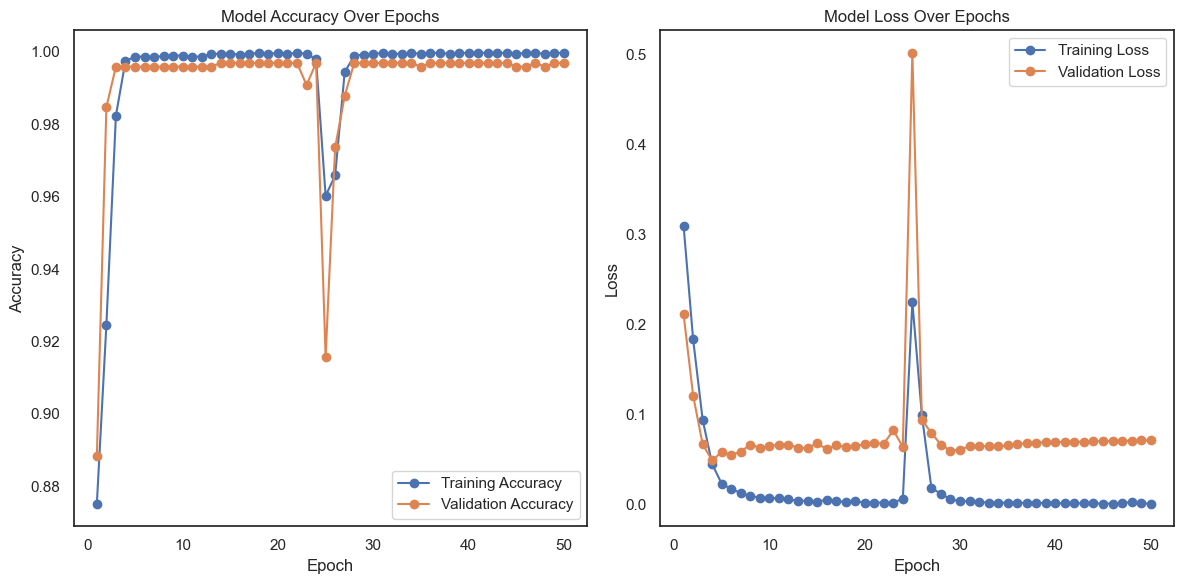

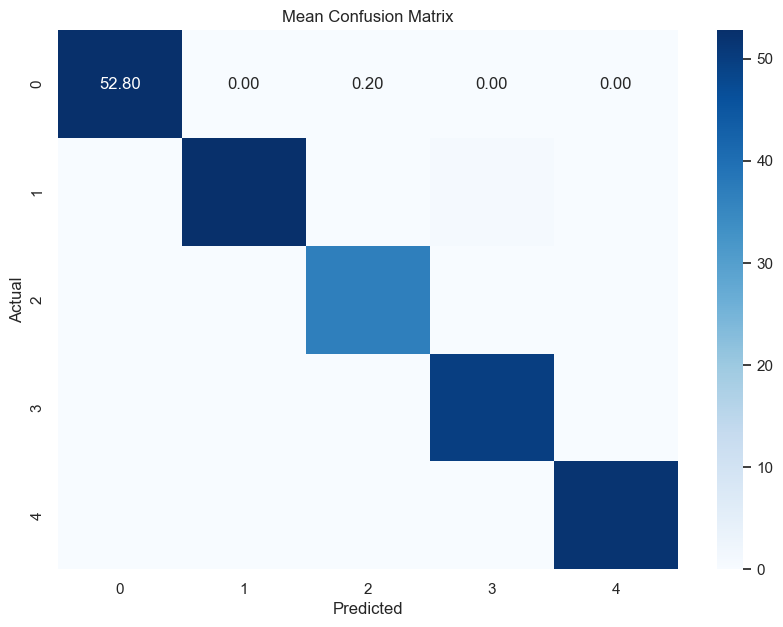

Mean Test Accuracy Across Folds: 99.19%


In [28]:
from keras.layers import LSTM, Bidirectional, TimeDistributed, Dense, Flatten, Dropout
from keras.optimizers import Adam

# Function to build the BiLSTM model
def build_bilstm(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=input_shape))
    model.add(TimeDistributed(Dense(50, activation='relu')))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(5, activation='softmax'))
    return model

# Assuming X_train, y_train, X_test, y_test are already defined
input_shape = (sequence_length, X_train.shape[-1])
bilstm_model = build_bilstm(input_shape)
bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the BiLSTM Model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

# Lists to store results from each fold
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
confusion_matrices = []
final_val_accuracies = []
final_test_accuracies = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    history = bilstm_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val))
    
    # Store training and validation accuracy and loss for each epoch
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Evaluate the model
    loss, accuracy = bilstm_model.evaluate(X_test, y_test)
    final_test_accuracies.append(accuracy)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    
    # Confusion Matrix
    y_pred = np.argmax(bilstm_model.predict(X_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    fold_no += 1

# Pad sequences to the length of the longest sequence
max_len = max(len(seq) for seq in train_accuracies)

def pad_sequences(sequences, max_len):
    padded_sequences = np.array([np.pad(seq, (0, max_len - len(seq)), 'edge') for seq in sequences])
    return padded_sequences

train_accuracies = pad_sequences(train_accuracies, max_len)
val_accuracies = pad_sequences(val_accuracies, max_len)
train_losses = pad_sequences(train_losses, max_len)
val_losses = pad_sequences(val_losses, max_len)

# Calculate mean and standard deviation over epochs
mean_train_accuracy = np.mean(train_accuracies, axis=0)
mean_val_accuracy = np.mean(val_accuracies, axis=0)
mean_train_loss = np.mean(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)

# Mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# Calculate mean test accuracy across all folds
mean_test_accuracy = np.mean(final_test_accuracies)

epochs = range(1, max_len + 1)  # Adjust the range to the actual number of epochs

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, mean_train_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, mean_val_accuracy, 'o-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, mean_train_loss, 'o-', label='Training Loss')
plt.plot(epochs, mean_val_loss, 'o-', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the confusion matrix averaged over all folds
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mean Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print mean accuracy and loss
print(f'Mean Test Accuracy Across Folds: {mean_test_accuracy * 100:.2f}%')


In [31]:
import tensorflow as tf
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_array

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, input_shape, epochs=50, batch_size=128, verbose=0):
        self.build_fn = build_fn
        self.input_shape = input_shape
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def fit(self, X, y):
        X = check_array(X)
        self.model_ = self.build_fn(self.input_shape)
        self.model_.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        self.history_ = self.model_.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            verbose=self.verbose,
            validation_split=0.2
        )
        return self

    def predict(self, X):
        X = check_array(X)
        return np.argmax(self.model_.predict(X), axis=-1)

    def predict_proba(self, X):
        X = check_array(X)
        return self.model_.predict(X)


Training fold 1...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 798ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 812ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 749ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 742ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step
Test Accuracy for fold 1: 98.37%
Training fold 2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step
5/5 

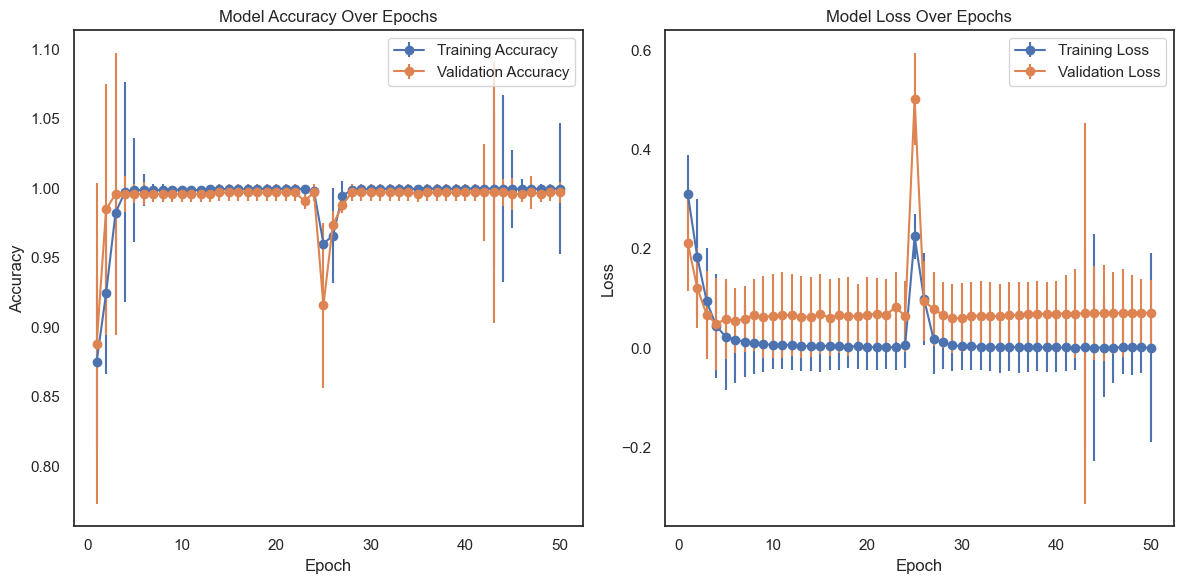

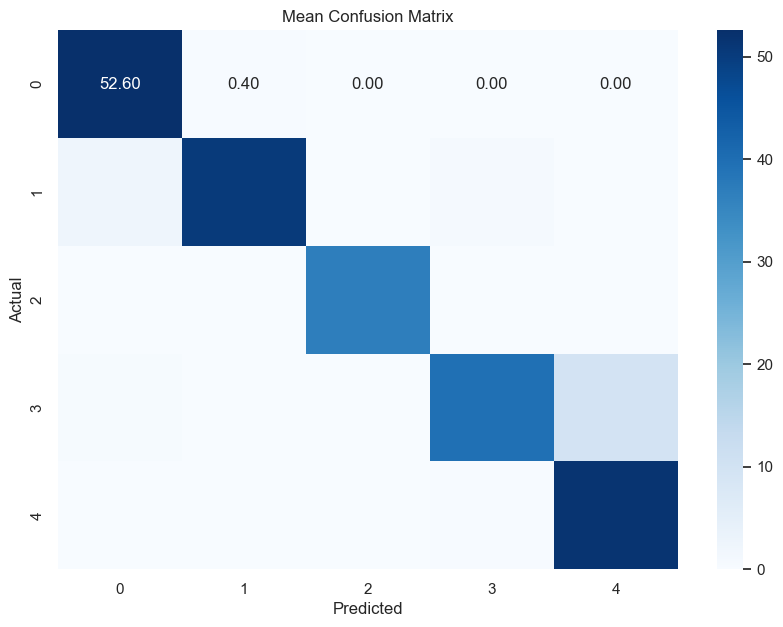

Mean Accuracy Across Folds: nan%
Mean Loss: nan
Mean F1 Score: 0.9263934982439073


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Custom Wrapper for Keras Models
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, input_shape, epochs=50, batch_size=128):
        self.build_fn = build_fn
        self.input_shape = input_shape
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model = self.build_fn(self.input_shape)
        self.model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0, validation_split=0.2)
        self.classes_ = np.unique(y)  # Store the classes
        return self

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

# Create KerasClassifier wrappers
input_shape = (X_train.shape[1], X_train.shape[2])  # Adjust according to your data shape
seqcnn_model = KerasClassifierWrapper(build_fn=build_seqcnn, input_shape=input_shape)
lstm_model = KerasClassifierWrapper(build_fn=build_lstm, input_shape=input_shape)
gru_model = KerasClassifierWrapper(build_fn=build_gru, input_shape=input_shape)

# Define the stacking ensemble
stacking_model = StackingClassifier(
    estimators=[
        ('seqcnn', seqcnn_model),
        ('lstm', lstm_model),
        ('gru', gru_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Define number of splits
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []
confusion_matrices = []
f1_scores = []
final_val_accuracies = []

# Iterate over each fold
fold_no = 1
for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Fit the stacking model
    stacking_model.fit(X_fold_train, y_fold_train)
    
    # Evaluate the model on the test set
    y_test_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy for fold {fold_no}: {accuracy * 100:.2f}%')
    
    # Confusion Matrix and F1 Score
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(conf_matrix)
    
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    f1_scores.append(f1)
    
    fold_no += 1

# Convert val_losses to a numpy array
val_losses = np.array(val_losses)

# Calculate mean and standard deviation for accuracy and loss over all folds
mean_conf_matrix = np.mean(confusion_matrices, axis=0)
mean_f1_score = np.mean(f1_scores)
mean_accuracy_across_folds = np.mean(final_val_accuracies)  # Ensure final_val_accuracies are recorded correctly
mean_loss = np.mean(val_losses, axis=0)  # Ensure val_losses are recorded correctly

# Plot training and validation accuracy with error bars
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(range(1, len(mean_train_accuracy) + 1), mean_train_accuracy, yerr=std_train_accuracy, fmt='o-', label='Training Accuracy')
plt.errorbar(range(1, len(mean_val_accuracy) + 1), mean_val_accuracy, yerr=std_val_accuracy, fmt='o-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss with error bars
plt.subplot(1, 2, 2)
plt.errorbar(range(1, len(mean_train_loss) + 1), mean_train_loss, yerr=std_train_loss, fmt='o-', label='Training Loss')
plt.errorbar(range(1, len(mean_val_loss) + 1), mean_val_loss, yerr=std_val_loss, fmt='o-', label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the confusion matrix averaged over all folds
plt.figure(figsize=(10, 7))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Mean Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print mean accuracy, loss, and F1 score
print(f'Mean Accuracy Across Folds: {mean_accuracy_across_folds * 100:.2f}%')
print(f'Mean Loss: {mean_loss}')
print(f'Mean F1 Score: {mean_f1_score}')


Training fold 1...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.2453 - loss: 2.7198 - val_accuracy: 0.4416 - val_loss: 2.4842
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.3374 - loss: 2.4260 - val_accuracy: 0.4365 - val_loss: 2.1828
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.3526 - loss: 2.1399 - val_accuracy: 0.4365 - val_loss: 1.9183
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.3863 - loss: 1.9391 - val_accuracy: 0.4365 - val_loss: 1.6809
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.4518 - loss: 1.7558 - val_accuracy: 0.4365 - val_loss: 1.5118
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.4882 - loss: 1.5993 - val_accuracy: 0.4365 - val_loss: 1.4045
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4905 - loss: 1.4928 - val_accuracy: 0.6193 - val_loss: 1.2914
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.5756 - loss: 1.3855 - val_accuracy:

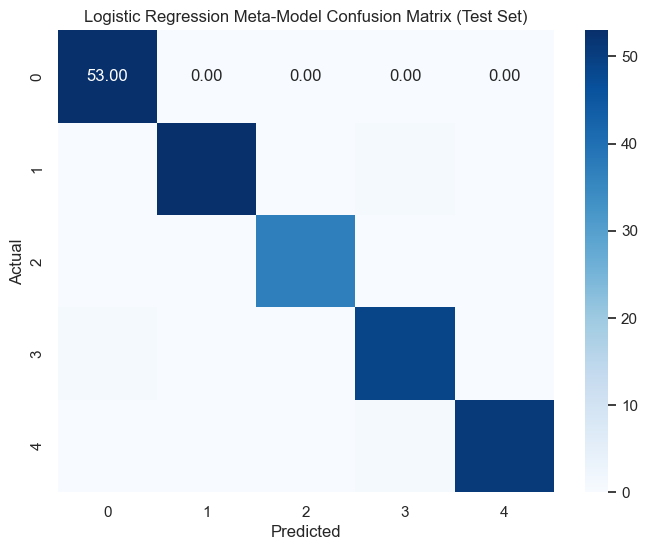

In [35]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam

# Assuming X_train, y_train, X_test, y_test are already defined
input_shape = (sequence_length, X_train.shape[-1])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results from each fold
final_train_predictions = []
final_val_predictions = []
final_test_predictions = []
final_val_targets = []

# Initialize fold number
fold_no = 1

for train_idx, val_idx in kfold.split(X_train, y_train):
    print(f'Training fold {fold_no}...')
    
    # Create the models for each fold to ensure weights are not carried over
    seqcnn_model = build_seqcnn(input_shape)
    lstm_model = build_lstm(input_shape)
    gru_model = build_gru(input_shape)
    
    seqcnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Indexing numpy arrays directly
    X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Fit each model
    seqcnn_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val))
    lstm_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val))
    gru_model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=128, validation_data=(X_fold_val, y_fold_val))
    
    # Predict on training and validation sets
    seqcnn_train_pred = seqcnn_model.predict(X_fold_train)
    lstm_train_pred = lstm_model.predict(X_fold_train)
    gru_train_pred = gru_model.predict(X_fold_train)
    
    seqcnn_val_pred = seqcnn_model.predict(X_fold_val)
    lstm_val_pred = lstm_model.predict(X_fold_val)
    gru_val_pred = gru_model.predict(X_fold_val)
    
    seqcnn_test_pred = seqcnn_model.predict(X_test)
    lstm_test_pred = lstm_model.predict(X_test)
    gru_test_pred = gru_model.predict(X_test)
    
    # Combine predictions from different models
    train_predictions = np.hstack((seqcnn_train_pred, lstm_train_pred, gru_train_pred))
    val_predictions = np.hstack((seqcnn_val_pred, lstm_val_pred, gru_val_pred))
    test_predictions = np.hstack((seqcnn_test_pred, lstm_test_pred, gru_test_pred))
    
    final_train_predictions.append(train_predictions)
    final_val_predictions.append(val_predictions)
    final_test_predictions.append(test_predictions)
    final_val_targets.append(y_fold_val)
    
    fold_no += 1

# Concatenate predictions from all folds
final_train_predictions = np.concatenate(final_train_predictions, axis=0)
final_val_predictions = np.concatenate(final_val_predictions, axis=0)
final_test_predictions = np.mean(final_test_predictions, axis=0)  # Averaging predictions

# Concatenate validation targets
final_val_targets = np.concatenate(final_val_targets, axis=0)

# Train logistic regression as a meta-model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(final_val_predictions, final_val_targets)

# Predict using the logistic regression meta-model
lr_val_pred = lr.predict(final_val_predictions)
lr_test_pred = lr.predict(final_test_predictions)

# Calculate accuracy of logistic regression meta-model
lr_val_accuracy = accuracy_score(final_val_targets, lr_val_pred)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)

print(f'Logistic Regression Meta-Model Validation Accuracy: {lr_val_accuracy * 100:.2f}%')
print(f'Logistic Regression Meta-Model Test Accuracy: {lr_test_accuracy * 100:.2f}%')

# Plot the confusion matrix for logistic regression meta-model on test set
lr_conf_matrix = confusion_matrix(y_test, lr_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Logistic Regression Meta-Model Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()